<a href="https://colab.research.google.com/github/Utkarshp1/Learning_TensorFlow/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References: Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
tf.__version__

'2.4.1'

# Keras Functional API

Implementation of Wide & Deep neural network. It connects all or parts of the input directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In constrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations. <br /><br />

*Heng-Tze Cheng et al., "Wide & Deep Learning for Recommender Systems," Proceedings of the First Workshop on Deep Learning for Recommender Systems (2016): 7-10*

Let's build a functional model for California housing problem:

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
          housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(
          X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [5]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11610, 8), (3870, 8), (5160, 8), (11610,), (3870,), (5160,))

In [ ]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input_, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

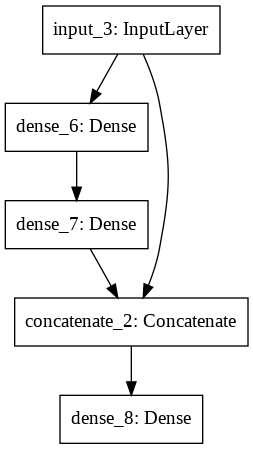

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 3.0286 - val_loss: 0.8020
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7672 - val_loss: 0.6883
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6777 - val_loss: 0.6491
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6314 - val_loss: 0.6214
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5985 - val_loss: 0.6026
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5947 - val_loss: 0.5865
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5834 - val_loss: 0.5707
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5465 - val_loss: 0.5647
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5611 - val_loss: 0.5502
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5198 - val_loss: 0.5452

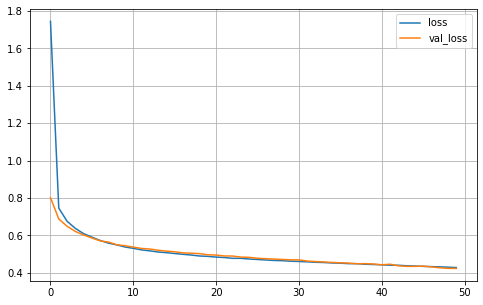

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## Another kind of Wide & Deep model

### Multiple inputs
What if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path? You can use multiple inputs. We send 5 features through the wide path and 6 features through the deep path.

In [ ]:
input_A = tf.keras.layers.Input(shape=[5], name='wide_input')
input_B = tf.keras.layers.Input(shape=[6], name='deep_input')
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input_A, hidden2])
output = tf.keras.layers.Dense(1, name='output')(concat)

model = tf.keras.Model(inputs=[input_A, input_B], outputs=[output])

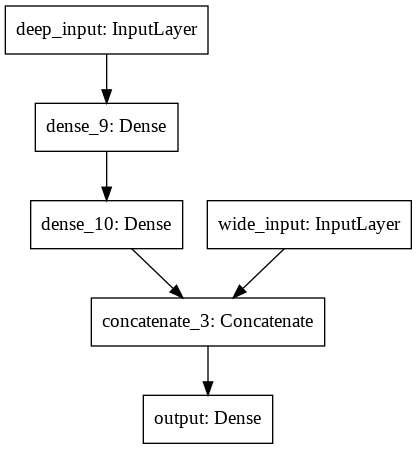

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit([X_train_A, X_train_B], y_train, epochs=50,
                    validation_data=([X_val_A, X_val_B], y_val))

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 3.0618 - val_loss: 0.8877
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.8043 - val_loss: 0.7581
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7268 - val_loss: 0.7139
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.7076 - val_loss: 0.6828
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6325 - val_loss: 0.6565
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5981 - val_loss: 0.6342
Epoch 7/50
363/363 [==============================] - 1s 3ms/step - loss: 0.6019 - val_loss: 0.6152
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5785 - val_loss: 0.5998
Epoch 9/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5699 - val_loss: 0.5845
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5579 - val_loss: 0.5744

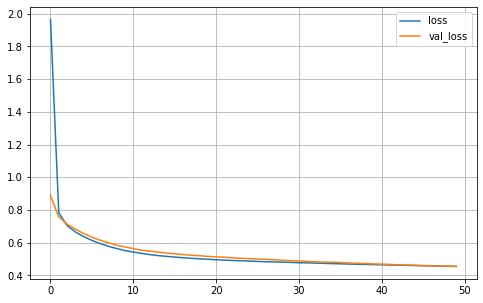

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

mse_test, y_pred

162/162 [==============================] - 0s 2ms/step - loss: 0.4622


(0.4621533155441284, array([[2.5168684],
        [2.7399347],
        [1.9719973]], dtype=float32))

### Multiple Outputs
Why multiple outputs?
* The task may demand it. (As in case of object detection, you may want to locate and classify the main object in a picture.)
* Multi-task learning
* As a regularizer. Auxilary output (like branching in Inception network) are the outputs of the network that are taken before the final layer and hence, have some kind of regularizing effect. 

In [ ]:
input_A = tf.keras.layers.Input(shape=[5], name='wide_input')
input_B = tf.keras.layers.Input(shape=[6], name='deep_input')
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([input_A, hidden2])
output = tf.keras.layers.Dense(1, name='main_output')(concat)
aux_output = tf.keras.layers.Dense(1, name='aux_output')(hidden2)

model = tf.keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

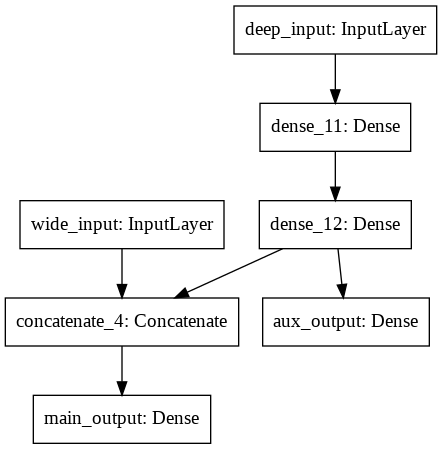

In [ ]:
tf.keras.utils.plot_model(model)

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). Alternatively, you can pass a dictionary that maps each output name to the corresponding loss. Just like for the inputs, this is useful when there are multiple outputs, to avoid getting the order wrong. <br /><br />
By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than the auxillary output (as it is just used for regularization), so we want to give main output's loss a much greater weight. 

In [ ]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [ ]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=50,
    validation_data=([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/50
363/363 [==============================] - 2s 5ms/step - loss: 1.3921 - main_output_loss: 1.2938 - aux_output_loss: 2.2770 - val_loss: 1.0326 - val_main_output_loss: 1.0241 - val_aux_output_loss: 1.1089
Epoch 2/50
363/363 [==============================] - 2s 4ms/step - loss: 0.6845 - main_output_loss: 0.6362 - aux_output_loss: 1.1188 - val_loss: 0.5412 - val_main_output_loss: 0.5035 - val_aux_output_loss: 0.8798
Epoch 3/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5707 - main_output_loss: 0.5303 - aux_output_loss: 0.9350 - val_loss: 0.5744 - val_main_output_loss: 0.5527 - val_aux_output_loss: 0.7691
Epoch 4/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4846 - main_output_loss: 0.4495 - aux_output_loss: 0.8011 - val_loss: 0.5402 - val_main_output_loss: 0.5215 - val_aux_output_loss: 0.7084
Epoch 5/50
363/363 [==============================] - 2s 5ms/step - loss: 0.5002 - main_output_loss: 0.4714 - aux_output_loss: 0.7588 - val_loss

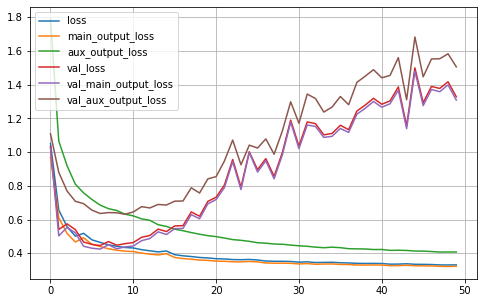

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Clearly, we have overfitted.

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
      [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

total_loss, main_loss, aux_loss, y_pred_main, y_pred_aux

162/162 [==============================] - 0s 2ms/step - loss: 21.9182 - main_output_loss: 21.6419 - aux_output_loss: 24.4058


(21.91824722290039, 21.641860961914062, 24.405776977539062, array([[9.100212 ],
        [7.7664857],
        [1.7690632]], dtype=float32), array([[9.620803 ],
        [8.517495 ],
        [1.2713225]], dtype=float32))

# Keras Subclassing API
In the Sequential API and Functional API you start by declaring which layers to use, how they are connected and only then you start feeding data for inference and training. This has several advantages:<br />
* Model can be saved, cloned and shared
* It's structure can be displayed and analyzed
* The framework can infer shapes and check types, so errors can be caught even before the data goes into the model.
Hence, the model is easy to debug. But the flip side is that the model is static: static graph of layers. <br />

Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

In the Subclassing API you create the layers you need in the constructor and use them to perform the computations in the `call()` method. Let's build the Wide & Deep model using Subclassing API.

In [6]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.Concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

With Subclassing API you can pretty much do anything you want in the `call()` method: for loops, if statements, low-level TensorFlow operations-your imagination is the limit.

Downsides of using Subclassing API:
Since your model's architecture is hidden within the `call()` method, it has following downsides:
* Keras cannot inspect it
* You cannot save or clone it
* When you call the `summary()` method, you only get a list of layers, without any information on how they are connected to each other.
* Keras cannot check types and shapes ahead of time, hence easier to make mistakes.

NOTE: Keras models have an `output` attribute, so we cannot use that name for the main output layer, which is why we renamed it to `main_output`.

In [7]:
model = WideAndDeepModel()

In [10]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-3))

In [11]:
model.summary()

ValueError: ignored

# Saving and Restoring a Model
To save a model use:
```
model.save("my_keras_model.h5")
```
Keras will use the HDF5 format to save:
* Model's architecture (including every layer's hyperparameters)
* The values of all the model parameters for every layer (e.g. connection weights and biases).
* Optimizer (including its hyperparameters and any state it may have).

To load the model use:
```
model = tf.keras.models.load_model("my_keras_model.h5")

```
NOTE: This will work when the Sequential API or the functional API, but unfortunately not when using model subclassing. You can use `save_weights()` and `load_weights()` to atleast save and restore the model parameters, but you will need to save and restore everything else yourself.

# Using Callbacks
`ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

In [ ]:
# [..] build and compile the model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb]) 

Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the `ModelCheckpoint`. In this case, it will only save your model when its performance on the validation set is the best so far.

`EarlyStopping` callback implements early stopping i.e. it will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and it will roll back to the best model. 

You can combine both the callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid time and resources).

The number of epochs can be set very large value since training will stop automatically when there is no progress. In this case, there is no need to restore the best model saved because the `EarlyStopping` callback will keep track of the best weights and restore them for you at the end of training.

You can write custom-made callbacks:

In [12]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train {:.2f}".format(logs["val_loss"]/logs["loss"]))

mycallback = PrintValTrainRatioCallback()

You can also have callbacks which stop training after certain level of accuracy is achieved:
```
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>=0.9):
            self.model.stop_training=True
```

# Fine-Tuning Neural Network Hyperparameters
One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross-validation). For example, we can use `GridSearchCV` or `RandomSearchCV` of Scikit-Learn to explore the hyperparameter space. To do this, we need to wrap our Keras models in objects that mimic Scikit-Learn regressors (because we are building regressor in the above example).

In [13]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    '''
        This function will build and compile a Keras model, given a set of
        hyperparameters.
    '''
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)

    return model

In [14]:
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

The `KerasRegressor` object is a thin wrapper around the Keras model built using `build_model()`. Since we did not specify any hyperparameters when creating it, it will use the default hyperparameters we defined in `build_model()`. Now, we can use this object like a regular Scikit-Learn regressor: we can train it using its `fit()` method, then evaluate it using its `score()` method, and use it to make predictions using its `predict()` method, as you can see in the following code:

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_val, y_val),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)